# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\mm183\Documents\Springboard\Modules\EDA_Projects\EDA_human_temperature\data\human_body_temperature.csv")

In [2]:
# Your work here.
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.tail())

(130, 3)
temperature    float64
gender          object
heart_rate     float64
dtype: object
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
     temperature gender  heart_rate
125         96.3      M        70.0
126         97.7      M        77.0
127         98.2      F        73.0
128         97.9      M        72.0
129         98.7      F        59.0


### 1. Is the distribution of body temperatures normal? 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#calculate mean and standard deviation of temperatures
mean = df.temperature.mean()
std = df.temperature.std()

#create control set of random samples
samples = np.random.normal(mean, std, size=1000)

#create formula for gathering values for cdf
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

#gather values for cdf of control set
x_theor, y_theor = ecdf(samples)

#gather values for empirical cdf
x, y = ecdf(df.temperature)

#plot cdf and ecdf
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker=',', linestyle='none')
_ = plt.xlabel('Temperature ($^\circ$Fahrenheit)')
_ = plt.ylabel('CDF')
plt.show()

### 2. Is the sample size large? Are the observations independent? 

Sample Size:  130


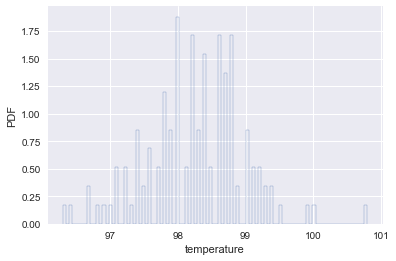

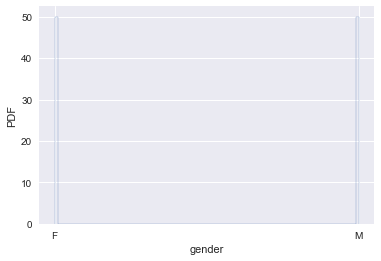

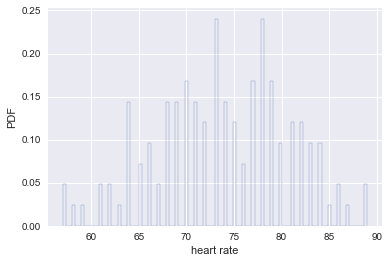

In [4]:
#check sample size
print('Sample Size: ', len(df))

#plot pdf for each variable to check for independece
_ = plt.hist(df.temperature, bins=100, normed=True, histtype='step')
_ = plt.xlabel('temperature')
_ = plt.ylabel('PDF')
plt.show()

_ = plt.hist(df.gender, bins=100, normed=True, histtype='step')
_ = plt.xlabel('gender')
_ = plt.ylabel('PDF')
plt.show()

_ = plt.hist(df.heart_rate, bins=100, normed=True, histtype='step')
_ = plt.xlabel('heart rate')
_ = plt.ylabel('PDF')
plt.show()

### 3. Is the true population mean really 98.6 degrees F? 
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
-  In this situation, is it appropriate to use the t or z statistic?
-  Now try using the other test. How is the result be different? Why? 

##### Bootstrap Approach

In [18]:
#make an array of translated temperatures
translated_temp = df.temperature - np.mean(df.temperature) + 98.6

#create function to draw bootstrap replicates
def draw_bs_reps(data, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = np.mean(bs_sample)
    return bs_replicates

#take bootstrap replicates
bs_replicates_temp = draw_bs_reps(df.temperature, 10000)

#compute fraction of replicates that are less than 98.6 degrees Fahrenheit 
p = np.sum(bs_replicates_temp <= np.mean(df.temperature)) / 10000

#show the p-value
print('p = ', p)

p =  0.5014


##### Frequentist Approach

I would use a one-sample test because I have one sample mean to compare to a null hypothesis value, and a z-test because the sample size is large (n>30)

In [6]:
import statsmodels.stats.weightstats as wstats

#one-sample z-test
print('tstat = %6.3f pvalue = %6.8f' % wstats.ztest(df.temperature, value=98.6, alternative='smaller'))

tstat = -5.455 pvalue = 0.00000002


In [7]:
from scipy import stats

#one-sample t-test
print('tstat = %6.3f pvalue = %6.8f' % stats.ttest_1samp(df.temperature, 98.6))

tstat = -5.455 pvalue = 0.00000024


The results are similar because in this case I am comparing the mean of a single population with a known value and the standard deviation is known, so a t-test doesn't yield additional utility

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

In [16]:
#draw sample of size 10 from data
sample = np.random.choice(df.temperature, size=10)

#one-sample z-test
print('z-test')
print('tstat = %6.3f pvalue = %6.8f' % wstats.ztest(sample, value=98.6, alternative='smaller'))

#one-sample t-test
print('t-test')
print('tstat = %6.3f pvalue = %6.8f' % stats.ttest_1samp(sample, 98.6))

z-test
tstat =  0.055 pvalue = 0.52202790
t-test
tstat =  0.055 pvalue = 0.95715114


The z-test is the correct one to use because the standard deviation is known and it yields a smaller p-value, showing that the z-statistic can be more useful in such situations, versus the t-statistic which might be more useful when comparing two means or if the standard deviation is unknown

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

##### Bootstrap Approach

95% confidence interval =  [98.12307692 98.37461538] degrees Fahrenheit


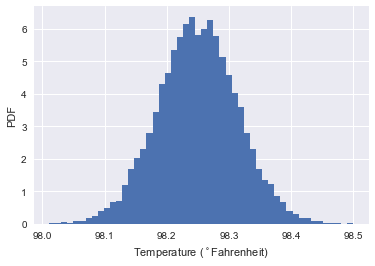

In [17]:
#draw bootstrap replicates
bs_replicates = draw_bs_reps(df.temperature, 10000)

#confidence interval for a single draw
print('95% confidence interval = ', np.percentile(bs_replicates, [2.5, 97.5]), 'degrees Fahrenheit')

#plot the histogram for the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Temperature ($^\circ$Fahrenheit)')
_ = plt.ylabel('PDF')
plt.show()

##### Frequentist Approach

In [10]:
#margin of error
print('margin of error: ', np.mean(df.temperature != mean))

#confidence interval for a single draw
print('confidence interval:', stats.norm.interval(0.95, loc=mean, scale=std))

margin of error:  1.0
confidence interval: (96.81221818540311, 99.68624335305844)


We should consider someone's temperature to be "abnormal" if it is below 96.8 degrees Fahrenheit or above 99.7 degrees Fahrenheit

### 6. Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

##### Frequentist Approach

In [32]:
#generate gender specific arrays
females_temp = df[df['gender'] == 'F'].temperature.values
males_temp = df[df['gender'] == 'M'].temperature.values

#conduct two-sample t-test for null hypothesis that both gender's have identical average values
print('t-test')
print('tstat = %6.3f pvalue = %6.8f' % stats.ttest_ind(females_temp, males_temp))

#print 95 percent confidence interval for each gender's draw
print('Females 95% confidence interval = ', np.percentile(females_temp, [2.5, 97.5]), 'degrees Fahrenheit')
print('Males 95% confidence interval = ', np.percentile(males_temp, [2.5, 97.5]), 'degrees Fahrenheit')

t-test
tstat =  2.285 pvalue = 0.02393188
Females 95% confidence interval =  [96.76 99.94] degrees Fahrenheit
Males 95% confidence interval =  [96.82 99.34] degrees Fahrenheit


I utilized the frequentist approach because it is simpler to enact and the populations being tested had equal variances, so an independent values t-test would be appropriate. The t-test for the mean temperatures of each gender showed that there was not a significant difference between them, which furthered the findings of earlier tests addressing the distribution of human temperature, adding results showing that the temperature of males and females shared significantly similar means.